## 0. Libraries

In [1]:
import string
import numpy as np
import pandas as pd
import sklearn
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from plotter import MovieTVShowPlotter

## 1. Loading / Investigating Dataset

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7977,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8804,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,15-Aug,Rajiv Chilaka,David Attenborough,United States,1-Jan-20,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7977 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
pd.DataFrame({'Total missing values': df.isna().sum(),
              'Percentage': (df.isna().sum()/len(df))*100})

,Total missing values,Percentage
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,830,9.424322
date_added,10,0.113546
release_year,0,0.000000
rating,4,0.045418
duration,3,0.034064


Since ~30% of director values are missing, cannot drop the NaN values.
    --> Let's just replace them with empty strings.

## 2. Recommendation Algorithm
### 2-1. Feature Selection
Choose columns need to be considered

In [6]:
df2 = df[['title', 'type', 'director', 'cast', 'rating', 'listed_in', 'description', 'release_year']]
df2.set_index('title', inplace=True)
df2.head()

,type,director,cast,rating,listed_in,description,release_year
title,,,,,,,
Dick Johnson Is Dead,Movie,Kirsten Johnson,NaN,PG-13,Documentaries,"As her father nears the end of his life, filmm...",2020
Blood & Water,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
Jailbirds New Orleans,TV Show,NaN,NaN,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
Kota Factory,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [7]:
df2.fillna('', inplace=True)
df2.head()

,type,director,cast,rating,listed_in,description,release_year
title,,,,,,,
Dick Johnson Is Dead,Movie,Kirsten Johnson,,PG-13,Documentaries,"As her father nears the end of his life, filmm...",2020
Blood & Water,TV Show,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
Jailbirds New Orleans,TV Show,,,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
Kota Factory,TV Show,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


For ease of use, let's get rid of all the spaces, ',' and change uppercase letters to lowercase letters.

In [8]:
def separate(texts):
    t = []
    for text in texts.split(','):
        t.append(text.replace(' ', '').lower())
    
    return ' '.join(t)

def remove_space(texts):
    return texts.replace(' ', '').lower()

def remove_punc(texts):
    return texts.translate(str.maketrans('', '', string.punctuation)).lower()

In [9]:
df2['type'] = df2['type'].apply(remove_space)
df2['director'] = df2['director'].apply(separate)
df2['cast'] = df2['cast'].apply(separate)
df2['rating'] = df2['rating'].apply(remove_space)
df2['listed_in'] = df2['listed_in'].apply(separate)
df2['description'] = df2['description'].apply(remove_punc)

df2.head()

,type,director,cast,rating,listed_in,description,release_year
title,,,,,,,
Dick Johnson Is Dead,movie,kirstenjohnson,,pg-13,documentaries,as her father nears the end of his life filmma...,2020
Blood & Water,tvshow,,amaqamata khosingema gailmabalane thabangmolab...,tv-ma,internationaltvshows tvdramas tvmysteries,after crossing paths at a party a cape town te...,2021
Ganglands,tvshow,julienleclercq,samibouajila tracygotoas samueljouy nabihaakka...,tv-ma,crimetvshows internationaltvshows tvaction&adv...,to protect his family from a powerful drug lor...,2021
Jailbirds New Orleans,tvshow,,,tv-ma,docuseries realitytv,feuds flirtations and toilet talk go down amon...,2021
Kota Factory,tvshow,,mayurmore jitendrakumar ranjanraj alamkhan ahs...,tv-ma,internationaltvshows romantictvshows tvcomedies,in a city of coaching centers known to train i...,2021


In [10]:
df2['bag_of_words'] = ''

# Combine all strings into 1 column
for i, row in enumerate(df2.iterrows()):
    string = ''
    for col in df2.columns:
        if row[1][col] == '' or type(row[1][col]) == int:
            continue
        else:
            string += row[1][col] + ' '
            df2['bag_of_words'][i] = string.strip()
            
df2.drop(df2.columns[:-2], axis=1, inplace=True)

In [11]:
df2.head()

,release_year,bag_of_words
title,,
Dick Johnson Is Dead,2020,movie kirstenjohnson pg-13 documentaries as he...
Blood & Water,2021,tvshow amaqamata khosingema gailmabalane thaba...
Ganglands,2021,tvshow julienleclercq samibouajila tracygotoas...
Jailbirds New Orleans,2021,tvshow tv-ma docuseries realitytv feuds flirta...
Kota Factory,2021,tvshow mayurmore jitendrakumar ranjanraj alamk...


### TF-IDF
- Term Frequency -- Inverse Document Frequency
- tells the importance of a word
- If the word appears more frequently --> less important --> lower tf-idf score

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
tfid = TfidfVectorizer()
tfid_matrix = tfid.fit_transform(df2['bag_of_words'])

In [14]:
cosine_sim = cosine_similarity(tfid_matrix, tfid_matrix)
cosine_sim

array([[1.00000000e+00, 6.51109225e-03, 2.51508724e-02, ...,
        1.22541028e-02, 2.30160299e-02, 3.60339526e-02],
       [6.51109225e-03, 1.00000000e+00, 1.02129814e-02, ...,
        1.37342009e-03, 0.00000000e+00, 7.44741025e-04],
       [2.51508724e-02, 1.02129814e-02, 1.00000000e+00, ...,
        7.23719722e-03, 7.21477380e-03, 4.24499407e-02],
       ...,
       [1.22541028e-02, 1.37342009e-03, 7.23719722e-03, ...,
        1.00000000e+00, 1.99475996e-02, 5.30430706e-03],
       [2.30160299e-02, 0.00000000e+00, 7.21477380e-03, ...,
        1.99475996e-02, 1.00000000e+00, 4.54842501e-03],
       [3.60339526e-02, 7.44741025e-04, 4.24499407e-02, ...,
        5.30430706e-03, 4.54842501e-03, 1.00000000e+00]])

In [15]:
final_df = df[['title', 'type', 'release_year', 'country', 'rating']]
final_df.fillna('', inplace=True)
final_df['rating'] = final_df['rating'].replace(['74 min', '84 min', '66 min', 'UR', ''], 'NR')
final_df['flag'] = 0

In [18]:
def recommendation(title, total_result=5, options=[]):
    '''
    A recommendation function that prints a list of movies/TV-shows that are similar to an input.
    Args:
        title: string (movie title)
        total_result: int (number of similar movies/tv-shows to be printed)
        options: a list of available options
            - "type": outputs are limited to the type of an input (either movie or tv-show)
            - "rating": outputs are limited to movies/tv-shows that are appropriate to the audience of an input
            - "country": outputs are limited to movies/tv-shows from the same country
            - year_range [non-negative integer]: outputs are limited to shows/movies released in
                            [input's release year += year_range]
    Returns:
        None
    Prints:
        A list of movies/TV-shows based on inputs.
    '''
                                    
    # Make dictionaries of ratings
    
    rating = {"TV-Y": 0, "TV-Y7": 1, "TV-Y7-FV": 1.1, "TV-G": 2, "TV-PG": 3, "TV-14": 4,
              "TV-MA": 5, "G": 0, "PG": 3, "PG-13": 3.1, "R": 5, "NC-17": 6, "NR": 7}
    
    year_range = -1
    count = 0
                   
    for option in options:
        if type(option) == int:
            if option < 0:
                raise ValueError("Year range MUST be >= 0.")
            count += 1
        elif type(option) == str:
            if (option != "country" and option != "type" and option != "rating"):
                raise ValueError("Please choose options from 'country', 'rating', and 'type'.")
        else:
            raise TypeError("Please provide valid options.")
            
        if count > 1:
            raise TypeError("Please provide at most 1 integer input (year_range).")       
            
    
    # Get the index
    index = final_df[final_df['title'] == title].index[0]
    
    # Create a new column for similarity
    final_df['similarity'] = cosine_sim[index]
    
    sort_final_df = final_df.sort_values(by='similarity', ascending=False)[0:total_result+1]
    
    if len(options) > 0:
        temp = final_df.sort_values(by='similarity', ascending=False)
        is_first = 1
        
        for option in options:
            if type(option) == int:
                if is_first == 1:
                    is_first = 0
                    for i in range(len(temp)):
                        if (abs(temp['release_year'].iloc[i] - temp['release_year'].iloc[0]) <= option):
                            temp['flag'].iloc[i] = 1
                else:
                    for i in range(len(temp)):
                        if (temp['flag'].iloc[i] == 1 and abs(temp['release_year'].iloc[i] - temp['release_year'].iloc[0]) > option):
                            temp['flag'].iloc[i] = 0
                        
            elif option == 'rating':
                if is_first == 1:
                    is_first = 0
                    for i in range(len(temp)):
                        if (rating[temp['rating'].iloc[i]] <= rating[temp['rating'].iloc[0]]):
                            temp['flag'].iloc[i] = 1
                else:
                    for i in range(1, len(temp)):
                        if (temp['flag'].iloc[i] == 1 and rating[temp['rating'].iloc[i]] > rating[temp['rating'].iloc[0]]):
                            temp['flag'].iloc[i] = 0
            
            # country, type
            elif option == 'type':
                if is_first == 1:
                    is_first = 0
                    for i in range(len(temp)):
                        if (temp[option].iloc[i] == temp[option].iloc[0]):
                            temp['flag'].iloc[i] = 1
                else:
                    for i in range(len(temp)):
                        if (temp['flag'].iloc[i] == 1 and temp[option].iloc[i] != temp[option].iloc[0]):
                            temp['flag'].iloc[i] = 0
        
            elif option == 'country':
                if (temp[option].iloc[0] == ''):
                    pass
                
                input_countries = []
                for country in temp[option].iloc[0].split(','):
                    input_countries += [country.replace(' ', '').lower()]
                
                for i in range(len(temp)):
                    curr_countries = []
                    for country in temp[option].iloc[i].split(','):
                        curr_countries += [country.replace(' ', '').lower()]
                        
                    flag = 0
                    
                    if is_first == 1:
                        for input_country in input_countries:
                            for curr_country in curr_countries:
                                if input_country == curr_country:
                                    temp['flag'].iloc[i] = 1
                                    flag = 1
                                if flag == 1:
                                    break
                            if flag == 1:
                                break
                    
                    else:
                        flag = 0
                        for input_country in input_countries:
                            for curr_country in curr_countries:
                                if input_country == curr_country:
                                    flag = 1
                                if flag == 1:
                                    break
                            if flag == 1:
                                break
                        if flag == 0:
                            temp['flag'].iloc[i] = 0
                            
                is_first = 0
            
        
        count = 0
        for i in range(len(temp)):
            if count == (total_result+1):
                break

            if temp.iloc[i]['flag'] == 1:
                sort_final_df.iloc[count] = temp.iloc[i]
                count += 1
   
    # Movies? TV shows?
    movies = sort_final_df['title'][sort_final_df['type'] == 'Movie']
    tv_shows = sort_final_df['title'][sort_final_df['type'] == 'TV Show']
    
    
    movies = []
    tv_shows = []
  
    for i in range(1, total_result+1):
        temp = {}
        temp["title"] = sort_final_df['title'].iloc[i]
        for option in options:
            if type(option) == int:
                temp["release_year"] = sort_final_df["release_year"].iloc[i]
            else:
                temp[option] = sort_final_df[option].iloc[i]
        
        if sort_final_df.iloc[i]['type'] == 'Movie':       
            movies.append(temp)
        else:
            tv_shows.append(temp)
    
    
    Input = sort_final_df.iloc[0]['title'] + " "
    for i in range(len(options)):
        temp = ''
        if (type(options[i]) == int):
            temp = str(sort_final_df['release_year'].iloc[0])
        else:
            temp = str(sort_final_df[options[i]].iloc[0])
            
        if i == 0:
            Input = Input + "(" + temp
        else:
            Input = Input + ", " + temp
            
        if i == len(options)-1:
            Input += ")\n"

    
    print("Input: ", Input)
    
    print('Similar Movie(s):')
    if len(movies) != 0:
        for i in range(len(movies)):
            Output = str(i+1) + ". " + movies[i]["title"] + " "
            
            for j in range(len(options)):
                temp = ''
                if type(options[j]) == int:
                    temp = str(movies[i]["release_year"])
                else:
                    temp = str(movies[i][options[j]])
                    
                if j == 0:
                    Output = Output + "(" + temp
                else:
                    Output = Output + ", " + temp
                    
                if j == len(options)-1:
                    Output += ")"
            
            print(Output)
    else:
        print('-\n')
        
    print()
        
    print('Similar TV show(s):')
    if len(tv_shows) != 0:
        for i in range(len(tv_shows)):
            Output = str(i+1) + ". " + tv_shows[i]["title"] + " "
            
            for j in range(len(options)):
                temp = ''
                if type(options[j]) == int:
                    temp = str(tv_shows[i]["release_year"])
                else:
                    temp = str(tv_shows[i][options[j]])
                    
                if j == 0:
                    Output = Output + "(" + temp
                else:
                    Output = Output + ", " + temp
                    
                if j == len(options)-1:
                    Output += ")"
            
            print(Output)
    else:
        print('-\n')

In [19]:
recommendation('Breaking Bad', 5, ["country", 30, "rating"])

Input:  Breaking Bad (United States, 2013, TV-MA)

Similar Movie(s):
1. The Show (United States, 2017, TV-MA)

Similar TV show(s):
1. Better Call Saul (United States, 2018, TV-MA)
2. Marvel's The Punisher (United States, 2019, TV-MA)
3. Dare Me (United States, 2019, TV-MA)
4. WHAT / IF (United States, 2019, TV-MA)


In [20]:
recommendation('Stranger Things', 10, ["country", "rating", 20])

Input:  Stranger Things (United States, TV-14, 2019)

Similar Movie(s):
1. Safe Haven (United States, PG-13, 2013)

Similar TV show(s):
1. Beyond Stranger Things (United States, TV-14, 2017)
2. The Umbrella Academy (United States, Canada, TV-14, 2020)
3. Manifest (United States, TV-14, 2021)
4. Haven (Canada, United States, TV-14, 2015)
5. Star-Crossed (United States, TV-14, 2014)
6. Motown Magic (Australia, United States, TV-Y, 2019)
7. Colony (United States, TV-14, 2018)
8. Chilling Adventures of Sabrina (United States, TV-14, 2020)
9. Good Witch (United States, Canada, TV-PG, 2019)


In [21]:
recommendation('Narcos', 20, ['country', 'rating', 'type', 1])

Input:  Narcos (United States, Colombia, Mexico, TV-MA, TV Show, 2017)

Similar Movie(s):
-


Similar TV show(s):
1. El Chapo (Mexico, United States, TV-MA, TV Show, 2018)
2. Halt and Catch Fire (United States, TV-14, TV Show, 2017)
3. Sense8 (United States, TV-MA, TV Show, 2018)
4. Dandy (Mexico, TV-MA, TV Show, 2016)
5. Mars (United States, TV-PG, TV Show, 2018)
6. Evil Genius (United States, TV-MA, TV Show, 2018)
7. The Day I Met El Chapo (United States, TV-MA, TV Show, 2017)
8. Person of Interest (United States, TV-14, TV Show, 2016)
9. Deep Undercover Collection (United States, TV-MA, TV Show, 2017)
10. El Chema (Mexico, TV-MA, TV Show, 2016)
11. La Viuda Negra (Colombia, Mexico, United States, TV-14, TV Show, 2016)
12. Señora Acero (Mexico, United States, TV-MA, TV Show, 2018)
13. Outlander (United States, TV-MA, TV Show, 2018)
14. Nicky Jam: El Ganador (Puerto Rico, United States, Colombia, TV-MA, TV Show, 2018)
15. American Crime (United States, TV-MA, TV Show, 2017)
16. Dragon

In [22]:
recommendation('Squid Game', 20, ['type', 10])

Input:  Squid Game (TV Show, 2021)

Similar Movie(s):
-


Similar TV show(s):
1. Chief of Staff (TV Show, 2019)
2. Under the Black Moonlight (TV Show, 2016)
3. The K2 (TV Show, 2016)
4. Color of Woman (TV Show, 2012)
5. Romance is a bonus book (TV Show, 2019)
6. Lovestruck in the City (TV Show, 2020)
7. Goodbye My Wife (TV Show, 2012)
8. Love (ft. Marriage and Divorce) (TV Show, 2021)
9. Kingdom (TV Show, 2020)
10. Live (TV Show, 2018)
11. The Liar and His Lover (TV Show, 2017)
12. Fit for Fashion (TV Show, 2015)
13. Do Do Sol Sol La La Sol (TV Show, 2020)
14. The Circle Brazil (TV Show, 2020)
15. 28 Moons (TV Show, 2016)
16. Prison Playbook (TV Show, 2017)
17. Kakegurui (TV Show, 2019)
18. Extracurricular (TV Show, 2020)
19. Bad Guys: Vile City (TV Show, 2018)
20. Secret Affair (TV Show, 2014)


In [23]:
recommendation('Stranger Things', 10, ['country', 'rating', 5])

Input:  Stranger Things (United States, TV-14, 2019)

Similar Movie(s):
-


Similar TV show(s):
1. Beyond Stranger Things (United States, TV-14, 2017)
2. The Umbrella Academy (United States, Canada, TV-14, 2020)
3. Manifest (United States, TV-14, 2021)
4. Haven (Canada, United States, TV-14, 2015)
5. Star-Crossed (United States, TV-14, 2014)
6. Motown Magic (Australia, United States, TV-Y, 2019)
7. Colony (United States, TV-14, 2018)
8. Chilling Adventures of Sabrina (United States, TV-14, 2020)
9. Good Witch (United States, Canada, TV-PG, 2019)
10. The Messengers (United States, TV-14, 2015)


### recommendation(`title`, `total_results`, `options`)

- `options`: list of options

    - can choose from `'country'`, `'rating'`, `'type'`, `year_range >= 0` in any order

In [24]:
def recommendation2(titles, total_result=5):
    '''
    Another recommendation function that prints a list of similar movies/TV-shows given a list of
    movies/TV-shows.
    Args:
        titles: a list of strings (movie titles)
        total_reulst: an integer (number of movies/TV-shows to be printed)
    Returns:
        None
    Prints:
        a list of similar movies/TV-shows given a list of movies/TV-shows.
    
    '''
    if type(titles) != list:
        raise TypeError("Please provide a list of titles.")
        
    indices = []
    for title in titles:
        indices.append(final_df[final_df['title'] == title].index[0])
        
    final_df['similarity'] = 0
    for index in indices:
        final_df['similarity'] += cosine_sim[index]
        
    num_input = len(titles)
    sort_final_df = final_df.sort_values(by='similarity', ascending=False)[num_input:total_result+num_input]

    movies = sort_final_df['title'][sort_final_df['type'] == 'Movie']
    tv_shows = sort_final_df['title'][sort_final_df['type'] == 'TV Show']
    
    print('Similar Movie(s) list:')
    if len(movies) != 0:
        for i, movie in enumerate(movies):
            print('{}. {}'.format(i+1, movie))
        print()
    else:
        print('-\n')
        
    print('Similar TV_show(s) list:')
    if len(tv_shows) != 0:
        for i, tv_show in enumerate(tv_shows):
            print('{}. {}'.format(i+1, tv_show))
    else:
        print('-')
    

In [25]:
recommendation2(['Stranger Things', "Squid Game", "Narcos", 'Breaking Bad', 'Chappie'], 10)

Similar Movie(s) list:
1. The Witch: Part 1 - The Subversion

Similar TV_show(s) list:
1. Beyond Stranger Things
2. Narcos: Mexico
3. Cocaine Cowboys: The Kings of Miami
4. Cleverman
5. The Umbrella Academy
6. Extracurricular
7. Haunted
8. Under the Black Moonlight
9. Chief of Staff


In [26]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.pairwise import linear_kernel

In [27]:
import networkx as nx
import time

def find_similar_movies(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]  

In [28]:
df['directors'] = df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
df['genres'] = df['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
df['actors'] = df['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
df['countries'] = df['country'].apply(lambda l: [] if pd.isna(l) else [i.strip().replace(" ","_") for i in l.split(",")])
df['all_features'] = df['directors'] + df['genres'] + df['actors'] + df['countries']
df['all_features'] = df['all_features'].apply(lambda x: " ".join(x))

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



vector = TfidfVectorizer(max_df=1.0, min_df=1,strip_accents = 'ascii', stop_words='english',lowercase=True,use_idf=True,norm=u'l2',smooth_idf=True)
tfidf = vector.fit_transform(df.all_features)

G = nx.Graph(label="MOVIE")
start_time = time.time()
for i, rowi in df.iterrows():
    G.add_node(rowi['title'],key=rowi['show_id'],label="MOVIE",mtype=rowi['type'],rating=rowi['rating'])
    for element in rowi['actors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="ACTED_IN")
    for element in rowi['genres']:
        G.add_node(element,label="GENRE")
        G.add_edge(rowi['title'], element, label="GENRE_IN")
    for element in rowi['directors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="DIRECTED")
    for element in rowi['countries']:
        G.add_node(element,label="COU")
        G.add_edge(rowi['title'], element, label="COU_IN")
    
    indices = find_similar_movies(tfidf, i, top_n = 3)
    snode="Sim("+rowi['title'][:15].strip()+")"        
    G.add_node(snode,label="SIMILAR")
    G.add_edge(rowi['title'], snode, label="SIMILARITY")
    for element in indices:
        G.add_edge(snode, df['title'].loc[element], label="SIMILARITY")
print(" finish -- {} seconds --".format(time.time() - start_time))       

 finish -- 17.343786001205444 seconds --


In [30]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):        
                sub_graph.add(e)
    return list(sub_graph)
def draw_sub_graph(sub_graph, title = ""):
    subgraph = G.subgraph(sub_graph)
    colors=[]
    sizes = []
    std_size = 500
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="MOVIE":
            colors.append('#b3042c')
            sizes.append(std_size*5)
        elif G.nodes[e]['label']=="PERSON":
            colors.append('#047d59')
            sizes.append(std_size*2.5)
        elif G.nodes[e]['label']=="GENRE":
            colors.append('#3a018a')
            sizes.append(std_size)
        elif G.nodes[e]['label']=="COU":
            colors.append('#bd3102')
            sizes.append(std_size*0.9)
        elif G.nodes[e]['label']=="SIMILAR":
            colors.append('#b87906')
            sizes.append(std_size)
        elif G.nodes[e]['label']=="CLUSTER":
            colors.append('#cdf7e9')
            sizes.append(std_size*0.9)
    fig, ax = plt.subplots(figsize = (18,18))
    nx.draw(subgraph, with_labels=True, alpha = 0.8, node_shape = 'o' ,node_size = sizes,cmap = 'Accent', edge_color = 'white',font_color = 'white',font_weight='bold',node_color=colors)    
    #plt.title('Recommendations after watching The video '+title+' :-')
    ax.set_title('Recommendations after watching The video '+title+' :-', color='white', size = 30)
    ax.axis('off')
    fig.set_facecolor('#44495c')
    plt.tight_layout()
    plt.show()

In [31]:
import math

def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):           
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="MOVIE":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    movies=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        movies.append(key) 
        weight.append(w)
    
    result = pd.Series(data=np.array(weight),index=movies)
    result.sort_values(inplace=True,ascending=False)        
    return result

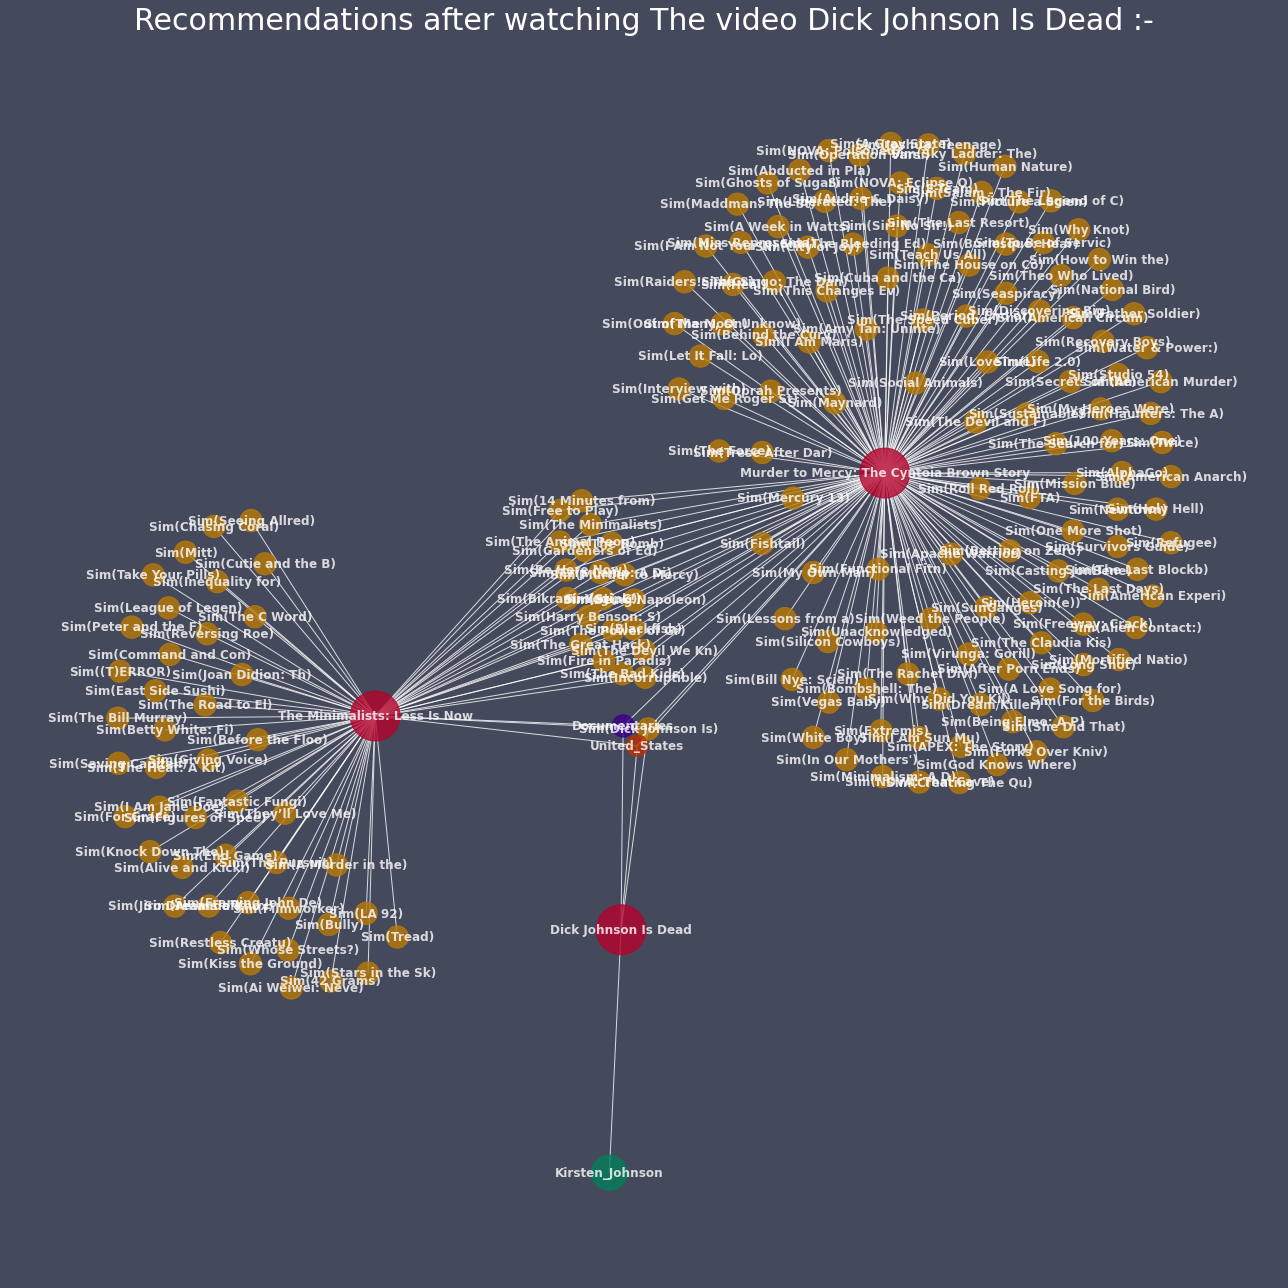

In [32]:
Movie="Dick Johnson Is Dead"
recommendation = get_recommendation(Movie)
rel_graph = get_all_adj_nodes([Movie]+list(recommendation.index[:2]))
draw_sub_graph(rel_graph,Movie)

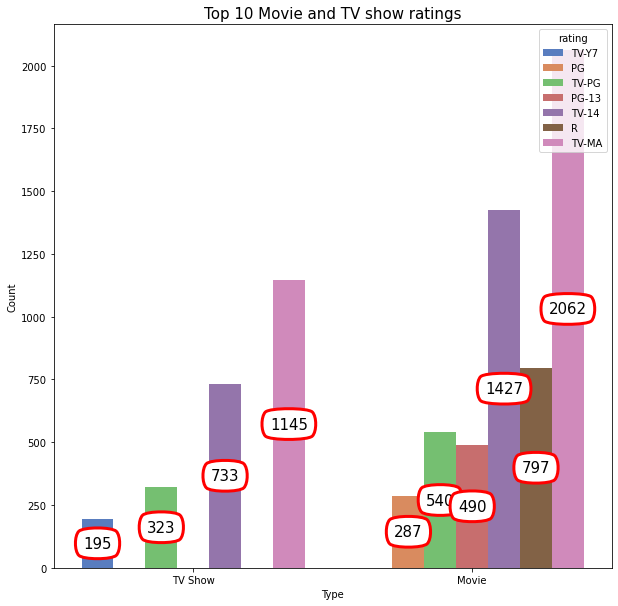

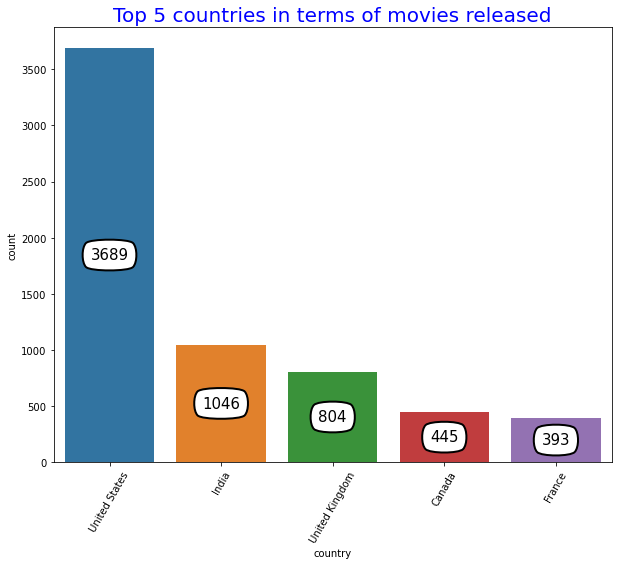

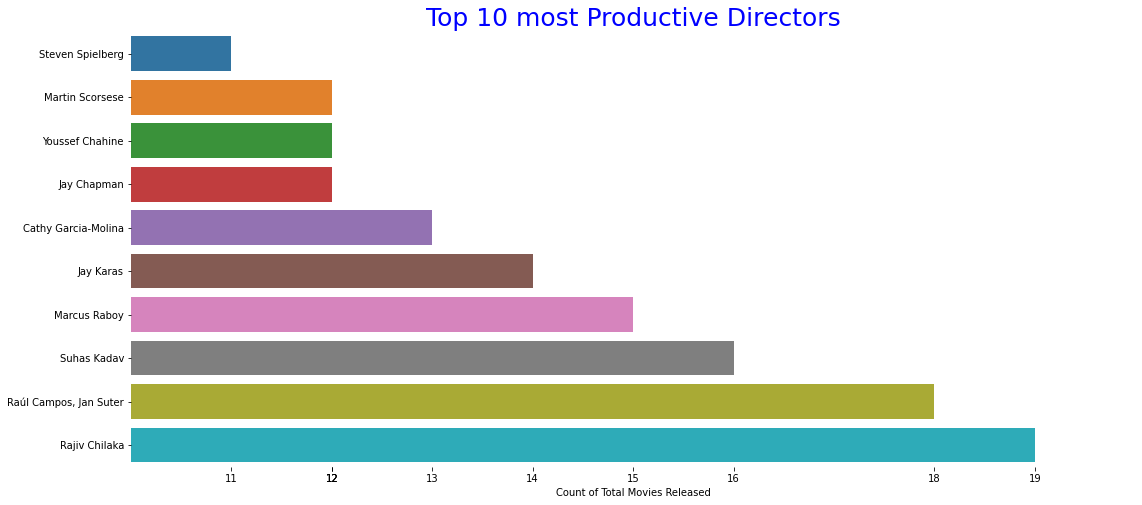

In [33]:
plotter = MovieTVShowPlotter(df, 'Top 10 Movie and TV show ratings', "svg")
plotter.plot()
plotter.plot_top_countries('Top 5 countries in terms of movies released')
plotter.plot2()